In [16]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob

from sklearn import decomposition
from sklearn.neighbors import KernelDensity
from sklearn.manifold import TSNE

matplotlib.style.use('fivethirtyeight')

In [17]:
#%% load the data, go over training images and store them in a list
maleFaceFiles   = glob.glob('D:/lict/p2/Pictures/*.png')
femaleFaceFiles = glob.glob('D:/lict/p2/Pictures_f/*.png')
faceFiles = maleFaceFiles + femaleFaceFiles

listOfPlayerNames = []
listOfImages = []
for imageFilename in faceFiles:
    currName = imageFilename.split("/")[-1].split('.')[0]
        
    try:
        currImage = mpimg.imread(imageFilename)
        if len(np.unique(currImage[:,:,0].ravel())) <= 40:
            print("no image for '" + currName + "'")
        else:
            listOfPlayerNames.append(currName)
            listOfImages.append(currImage)
    except:
        print("didn't load '" + currName + "'")
        
femaleNames = [x.split("/")[-1].split('.')[0] for x in femaleFaceFiles]
isFemale    = [x in femaleNames for x in listOfPlayerNames]

print('Total number of loaded face images is %d' %(len(listOfImages)))

Total number of loaded face images is 572


In [18]:
#%% show some images

matplotlib.rcParams['font.size'] = 9
matplotlib.rcParams['figure.figsize'] = (12,19)

numRows = 9; numCols = 5

plt.figure()
for k in range(numRows*numCols):
    randInd = np.random.randint(len(listOfImages))
    plt.subplot(numRows,numCols,k+1); 
    plt.imshow(listOfImages[randInd])
    plt.title(listOfPlayerNames[randInd]); plt.axis('off')

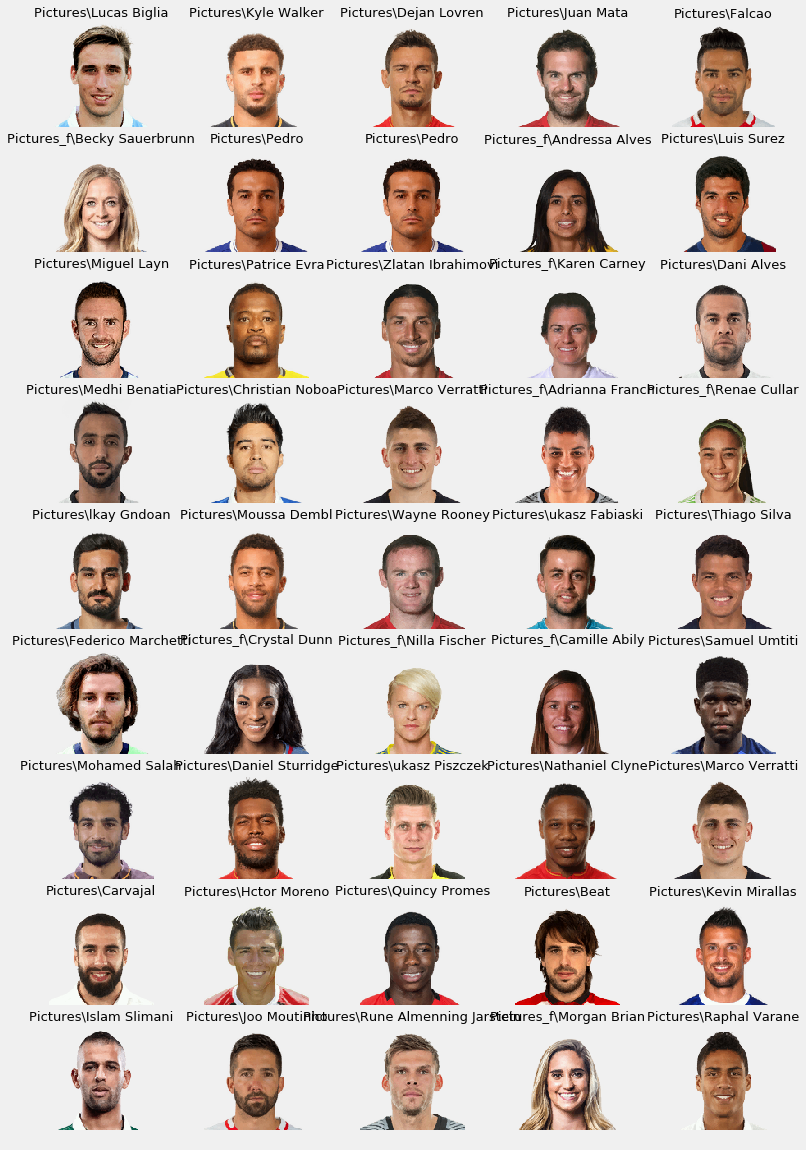

In [19]:
plt.show()

In [7]:
#%% gather everything into a large matrix
fullImageMatrix4D = np.zeros((128,128,3,len(listOfImages)))

backGroundImage = np.zeros((128,128,3))
backGroundImage[:,:,0] = 0.3
backGroundImage[:,:,1] = 0.4
backGroundImage[:,:,2] = 0.5

for k, currImage in enumerate(listOfImages):
    alphaChannel = currImage[:,:,3]
    rgbImage = currImage[:,:,:3]
    tiledAlpha = np.tile(alphaChannel[:,:,np.newaxis],(1,1,3))
    
    fullImageMatrix4D[:,:,:,k] = rgbImage*tiledAlpha + (tiledAlpha < 0.15)*backGroundImage

In [12]:


# show mean face image and stdev image
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (12,12)

plt.figure(); 
plt.subplot(1,2,1); plt.imshow(fullImageMatrix4D.mean(axis=3)); 
plt.title('mean face Image'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(fullImageMatrix4D.std(axis=3)); 
plt.title('standard deviation Image'); plt.axis('off')




(-0.5, 127.5, 127.5, -0.5)

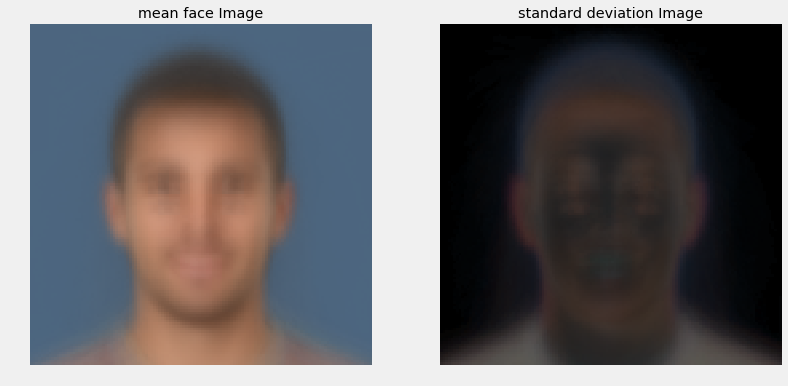

In [13]:
plt.show()